In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [107]:
from sklearn.datasets import load_boston
data, target = load_boston(return_X_y=True)
features = load_boston()['feature_names']
data = pd.DataFrame(data, columns=features)
data['PRICE'] = target
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [108]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


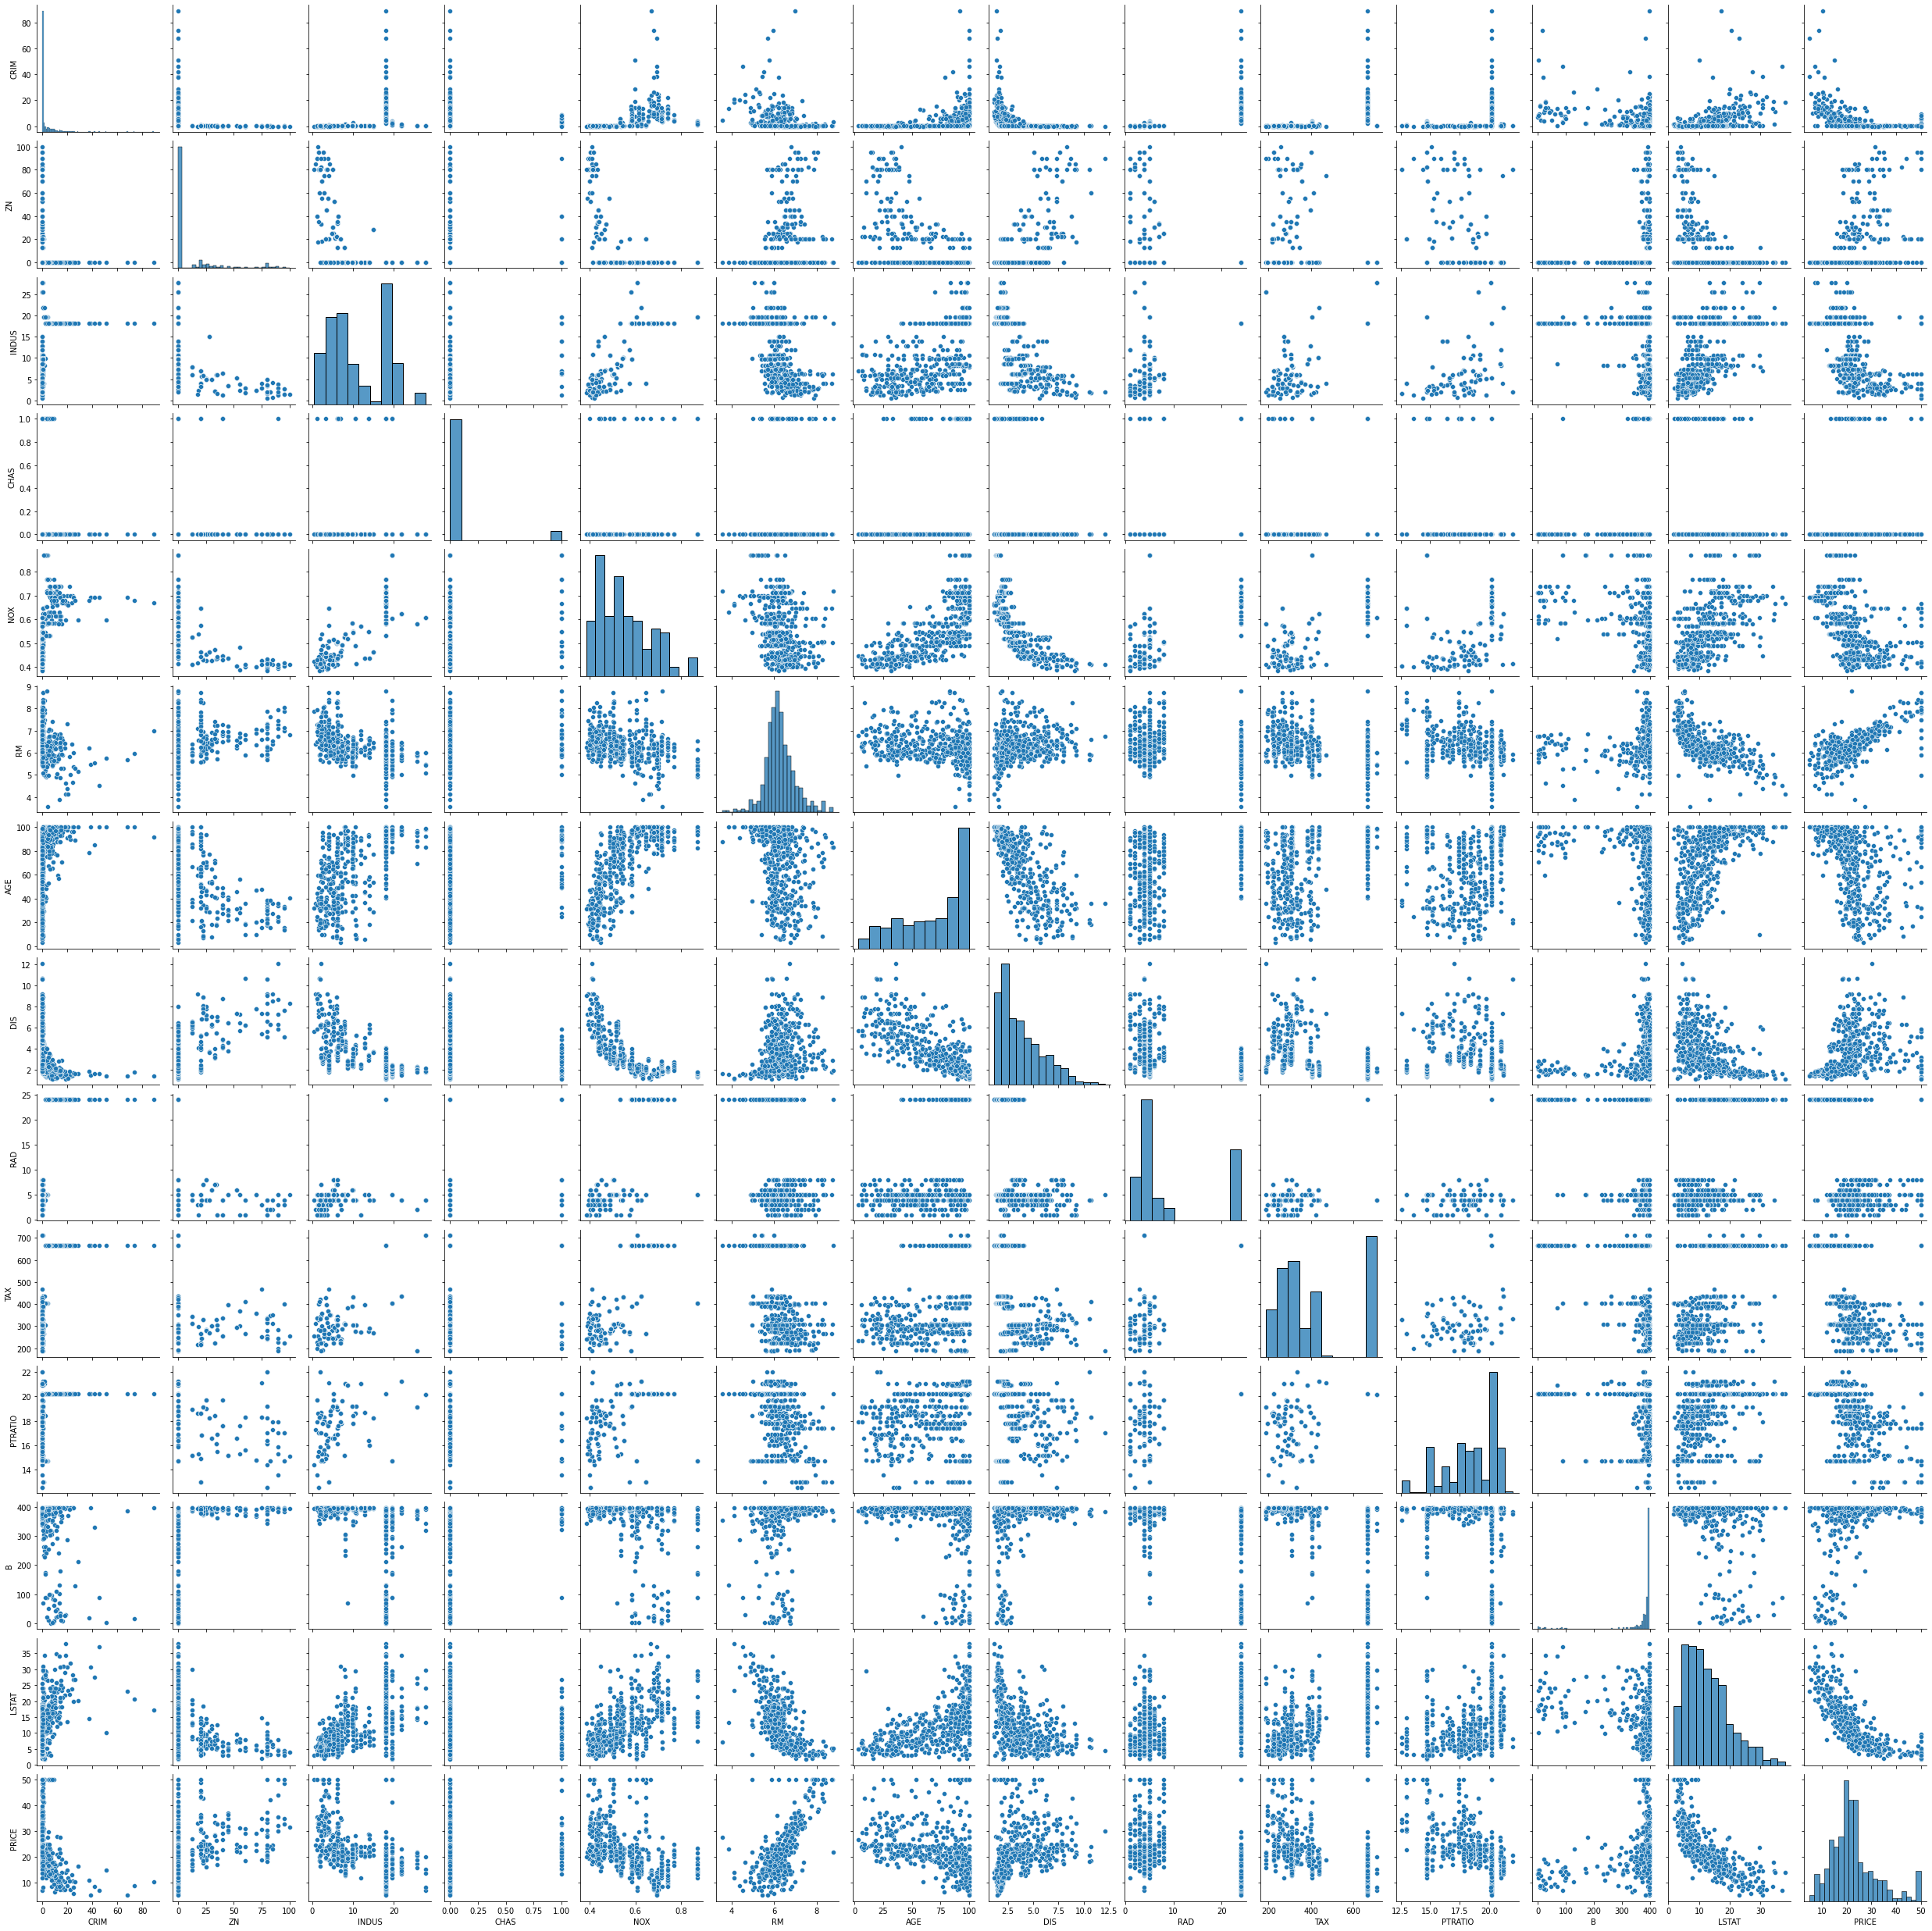

In [109]:
sns.pairplot(data)

**Useful features:**


1.   LSTAT
2.   RM
3.   DIS
4.   INDUS



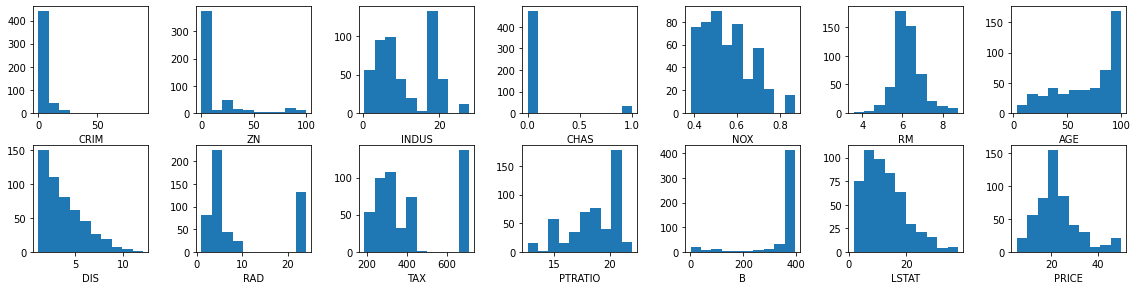

In [110]:
fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(16,4))
plt.tight_layout()

cols = data.columns
index = 0
for i in range(2):
  for j in range(7):
    axs[i][j].hist(data[cols[index]])
    axs[i][j].set_xlabel(cols[index])
    index += 1


USEFUL FEATURES:


1.   DIS
2.   AGE
3.   RM(IMPORTANT FEATURE)
4.   LSTAT
5.   NOX
6.   PTRATIO

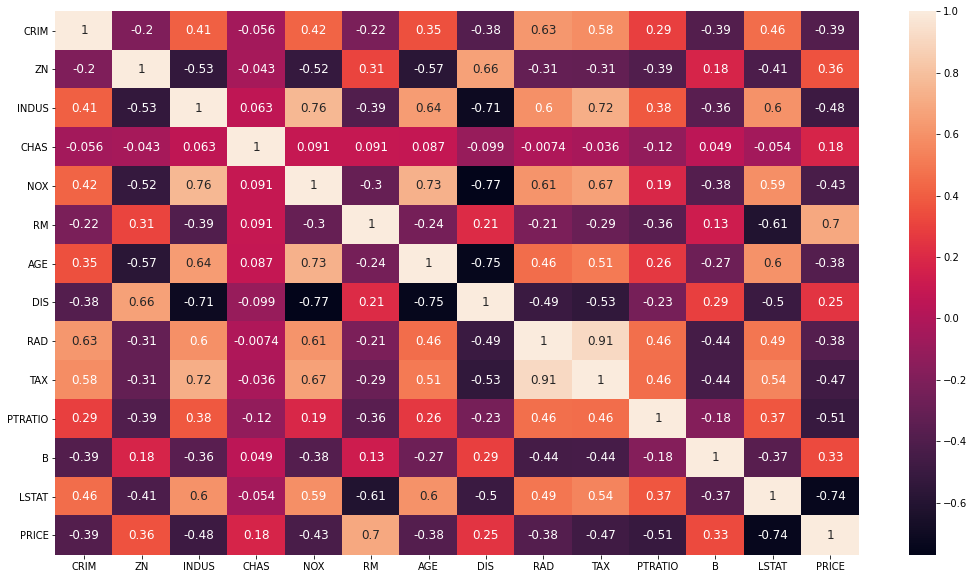

In [111]:
fig, axs = plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(), annot=True, annot_kws={'size':12})

**Features with corr > .5**


1.   LSTAT
2.   PTRATIO
3.   RM



In [112]:
selectedFeatures = data[['LSTAT', 'PTRATIO', 'RM']]

In [113]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(selectedFeatures, target, test_size=0.4, shuffle=False)
X_train.head()

,LSTAT,PTRATIO,RM
0,4.98,15.3,6.575
1,9.14,17.8,6.421
2,4.03,17.8,7.185
3,2.94,18.7,6.998
4,5.33,18.7,7.147


In [114]:
#LinearModelSection
#Train the model using multiple features
linModel = LinearRegression()
linModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
#Predict Data(Training Data)
predictedTrainVals = linModel.predict(X_train)

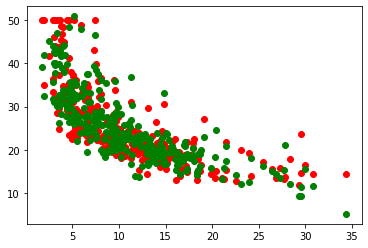

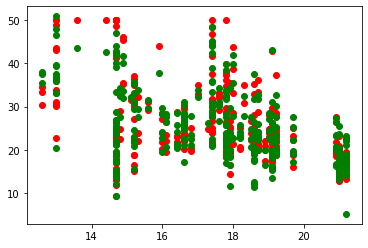

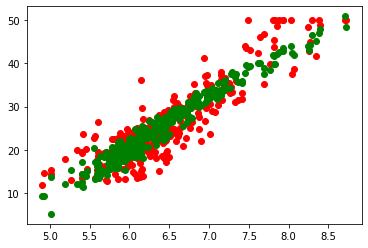

In [116]:
for i in range(len(selectedFeatures.columns)):
  plt.scatter(X_train[selectedFeatures.columns[i]], y_train, color='red')
  plt.scatter(X_train[selectedFeatures.columns[i]], predictedTrainVals, color='green')
  plt.show()

In [117]:
#Measuring Accuracy
error = mean_squared_error(y_train, predictedTrainVals)
error

12.554670437220699

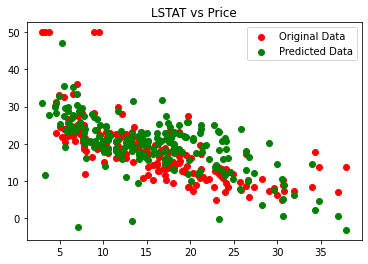

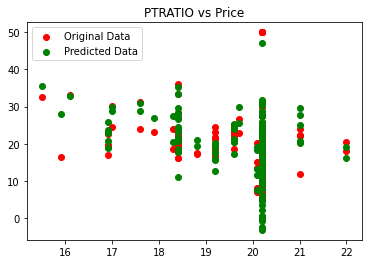

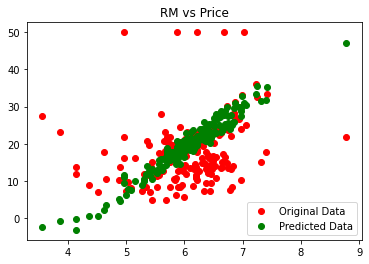

In [118]:
#Predicting Testing Data and calculating mse
predictedTestVals = linModel.predict(X_test)
error = mean_squared_error(predictedTestVals, y_test)
error
for i in range(len(selectedFeatures.columns)):
  plt.title(selectedFeatures.columns[i] + " vs " + "Price")
  plt.scatter(X_test[selectedFeatures.columns[i]], y_test, color='red', label='Original Data')
  plt.scatter(X_test[selectedFeatures.columns[i]], predictedTestVals, color='green', label="Predicted Data")
  #plt.plot(X_test[selectedFeatures.columns[i]], predictedTestVals, color='aqua')
  plt.legend()
  plt.show()

In [143]:
#Using single independent variable of highest correlation
#Training model
linModel1 = LinearRegression()
x = X_train['RM'].values.reshape(-1,1)
y = y_train
linModel1.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
predictedTrainVals1 = linModel1.predict(x)
error = mean_squared_error(predictedTrainVals1, y_train)
error

15.288994710322543

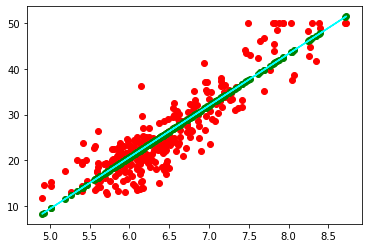

In [147]:
#Plotting the single variate data
plt.scatter(x, y, color='red')
plt.scatter(x, predictedTrainVals1, color='green')
plt.plot(x, predictedTrainVals1, color='aqua')

In [208]:
#Although the data seems linear and im sure decision tree is not for this
#But still trying
#So, training a decision tree model
decisionModel = DecisionTreeRegressor(max_depth=3)
decisionModel.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

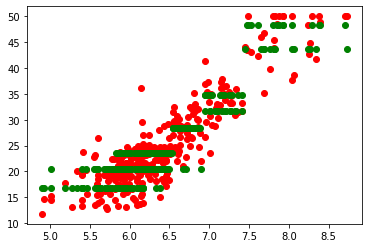

In [190]:
predictedTreeValues = decisionModel.predict(X_train)
plt.scatter(X_train["RM"], y_train, color='red')
plt.scatter(X_train['RM'], predictedTreeValues, color='green')
plt.show()

In [178]:
#Calculate error for this model
errorTreeTrain = mean_squared_error(predictedTreeValues, y_train)
errorTreeTrain
#This seems the lowest but im afraid it's overfitted data
#So lets check it in test values
errorTreeTest = mean_squared_error(decisionModel.predict(X_test), y_test)
errorTreeTrain, errorTreeTest
#This is wrong, and i knew it

(12.453326228635662, 56.146984144720776)

In [210]:
#I think this tree model could do better if I used all features
#So training another tree model
treeModel2 = DecisionTreeRegressor(max_depth=4)
data.drop(['PRICE'], axis=1)

#Lets split data to figureout over or underfitting later
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, target, test_size=0.4, shuffle=False)

treeModel2.fit(X_train1, y_train1)

predictedTreeVals2 = treeModel2.predict(X_train1)
errorTree2 = mean_squared_error(predictedTreeVals2, y_train)
errorTree2
#Hmm error is certainly lower, lets plot curves before testing with test data

0.35952724023292315

In [223]:
predictedTreeValsTest2 = treeModel2.predict(X_test1)
errorTreeTest2 = mean_squared_error(predictedTreeValsTest2, y_test)
errorTreeTest2, errorTree2
#Hmm, it certainly is better version, but I think bagging with decision tree can help us out here since variation is high between training and testing predictions
#Let's try that out

(5.351283604402863, 0.35952724023292315)

In [234]:
from sklearn.ensemble import BaggingRegressor

baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators = 20)
baggingModel.fit(X_train, y_train)

errorBagging = mean_squared_error(y_train, baggingModel.predict(X_train))
errorBagging

#Testing data
errorBaggingTest = mean_squared_error(y_test, baggingModel.predict(X_test))
errorBaggingTest, errorBagging

(44.09727007389163, 1.5124726072607262)

In [242]:
#Lets try boostong the model
from sklearn.ensemble import AdaBoostRegressor
boostingModel = AdaBoostRegressor(learning_rate=0.01, n_estimators=10)
boostingModel.fit(X_train, y_train)

trainingBoostError = mean_squared_error(y_train, boostingModel.predict(X_train))
testingBoostError = mean_squared_error(y_test, boostingModel.predict(X_test))
trainingBoostError, testingBoostError

(7.862261405434878, 42.48938157867282)

By far, my decision tree regressor with depth 4 turned out to be the highly accurate model, relatively speaking. So, treeModel2 is the model to use in this analysis. But the bad thing is, I have to provide multiple features during prediction as well. One value cannot predict the accurately, unless we use older linear models.